In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [9]:
data = pd.read_csv('data_source/log2.csv')
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [11]:
labelencoder=LabelEncoder()
for col in ['Source Port','Destination Port','NAT Source Port','NAT Destination Port']:
    data[col] = labelencoder.fit_transform(data[col])
 
data.tail(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65522,12195,3212,0,0,deny,66,66,0,1,0,1,0
65523,13790,1215,0,0,deny,66,66,0,1,0,1,0
65524,12688,1804,0,0,deny,62,62,0,1,0,1,0
65525,22516,10,14203,9,allow,356,118,238,2,30,1,1
65526,10740,2161,28976,1669,allow,70,70,0,2,8,2,0
65527,21002,15,5390,11,allow,314,192,122,6,15,4,2
65528,10093,15,5499,11,allow,4680740,67312,4613428,4675,77,985,3690
65529,13542,28,0,0,drop,70,70,0,1,0,1,0
65530,13541,28,0,0,drop,70,70,0,1,0,1,0
65531,13538,28,0,0,drop,70,70,0,1,0,1,0


In [60]:
data['Action'].replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)

data.tail(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65522,12195,3212,0,0,1,66,66,0,1,0,1,0
65523,13790,1215,0,0,1,66,66,0,1,0,1,0
65524,12688,1804,0,0,1,62,62,0,1,0,1,0
65525,22516,10,14203,9,0,356,118,238,2,30,1,1
65526,10740,2161,28976,1669,0,70,70,0,2,8,2,0
65527,21002,15,5390,11,0,314,192,122,6,15,4,2
65528,10093,15,5499,11,0,4680740,67312,4613428,4675,77,985,3690
65529,13542,28,0,0,2,70,70,0,1,0,1,0
65530,13541,28,0,0,2,70,70,0,1,0,1,0
65531,13538,28,0,0,2,70,70,0,1,0,1,0


Imbalance data

In [15]:
# Class count
count_class_0, count_class_1,count_class_2,count_class_3 = data.Action.value_counts()

# Divide by class
df_class_0 = data[data['Action'] == 0]
df_class_1 = data[data['Action'] == 1]
df_class_2 = data[data['Action'] == 2]
df_class_3 = data[data['Action'] == 3]

Random over-sampling:
0    37640
1    37640
2    37640
3    37640
Name: Action, dtype: int64


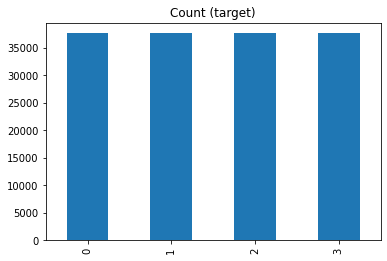

In [18]:
#Over sampling

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)

df_over = pd.concat([df_class_0,df_class_1_over,df_class_2_over, df_class_3_over], axis=0)

print('Random over-sampling:')
print(df_over.Action.value_counts())

df_over.Action.value_counts().plot(kind='bar', title='Count (target)')

Over-sampling: SMOTE

In [89]:
X = data[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']]
X = X.to_numpy()

y = data['Action']

X

array([[15780,    10, 23985, ...,    30,     1,     1],
       [14847,   183, 24834, ...,    17,    10,     9],
       [  636,  2577, 18749, ...,  1199,     1,     1],
       ...,
       [13542,    28,     0, ...,     0,     1,     0],
       [13541,    28,     0, ...,     0,     1,     0],
       [13538,    28,     0, ...,     0,     1,     0]], dtype=int64)

In [73]:
y = data['Action']
X = data

In [39]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [127]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['yellow', 'blue', 'red','green']
    #colors = ['yellow', 'blue']
    #markers = ['o', 's']
    markers = ['o', 's', '*', '+']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            #X[y==l, 2],
            #X[y==l, 3],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [86]:
from imblearn.over_sampling import SMOTE

#smote = SMOTE(ratio='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X, y, 'SMOTE over-sampling')

TypeError: scatter() got multiple values for argument 'c'

In [ ]:
# split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0,stratify=data['Action'])

# save the data
train.to_csv('data_source/train.csv',index=False)
test.to_csv('data_source/test.csv',index=False)

# test = pd.read_csv('data_source/test.csv')
# train = pd.read_csv('data_source/train.csv')
print('hello')

torchsampler

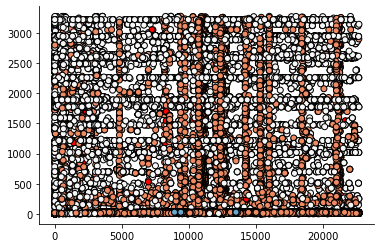

In [100]:
import seaborn as sns

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' if v == 2 else 'red' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()


In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

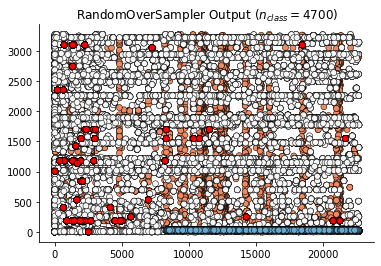

In [91]:
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' if v == 2 else 'red' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

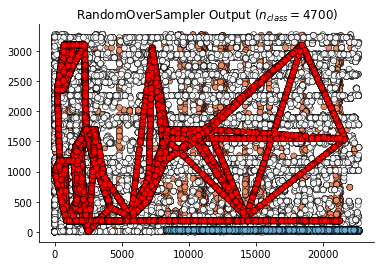

In [117]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy='not majority')
smt.fit(X, y)
X_resampled, y_resampled = smt.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' if v == 2 else 'red' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

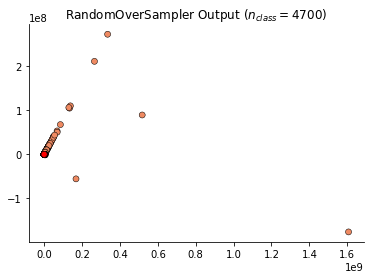

In [134]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='auto')
smt.fit(X, y)
X_resampled, y_resampled = smt.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' if v == 2 else 'red' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

d:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


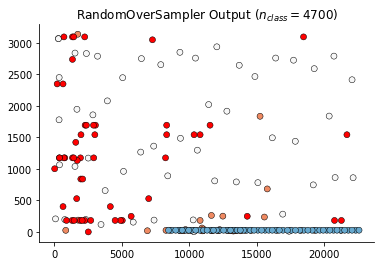

In [118]:
from imblearn.under_sampling import ClusterCentroids

smt = ClusterCentroids(sampling_strategy='not minority')
smt.fit(X, y)
X_resampled, y_resampled = smt.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' if v == 2 else 'red' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=4700)$")
pass

In [121]:
y_resampled.value_counts()

2    37522
3    37202
0    37113
1    36606
Name: Action, dtype: int64

In [104]:
y.value_counts()

0    37640
1    14987
2    12851
3       54
Name: Action, dtype: int64

In [87]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [88]:
y

array([2, 2, 2, ..., 2, 2, 2])

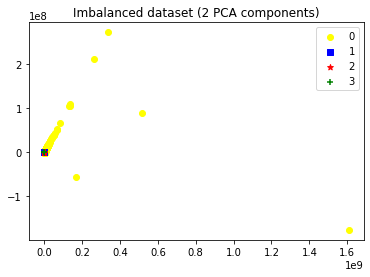

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

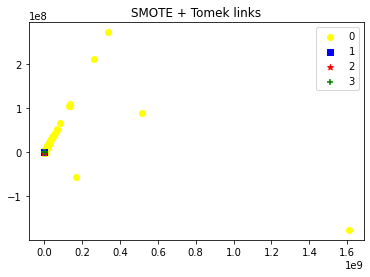

In [132]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [133]:
 y_smt.value_counts()

2    37614
0    37608
3    37246
1    37188
Name: Action, dtype: int64